In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

In [7]:
ee[:7] = 0

In [8]:
ee[20:] = 0

In [9]:
ee = ee * 2.5

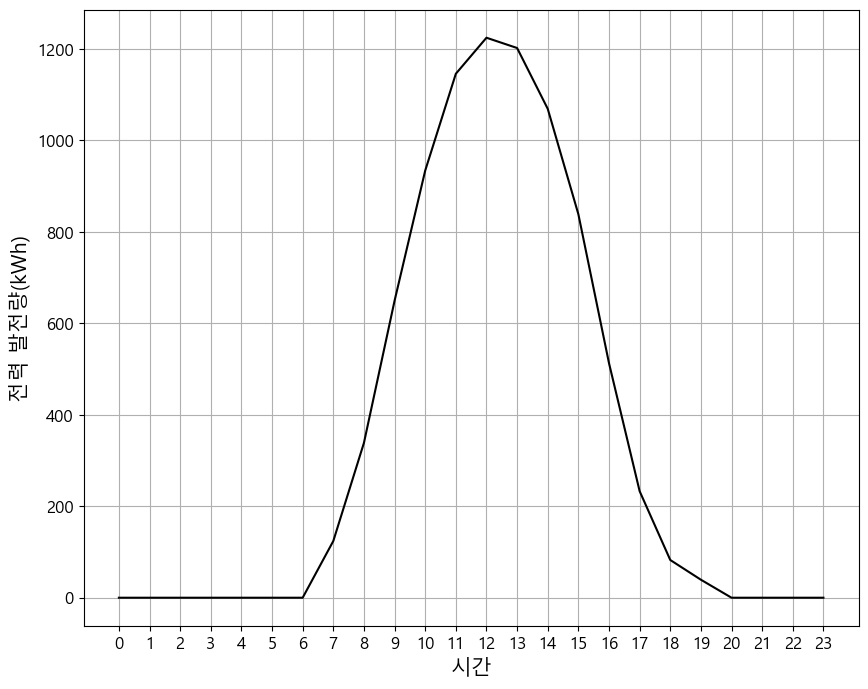

In [10]:
plt.figure(figsize=(10,8))
plt.plot(ee, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 발전량(kWh)', fontsize = 15)
plt.show()

In [11]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [12]:
df.date_time = pd.to_datetime(df.date_time)

In [13]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [14]:
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

In [15]:
for i in tqdm(range(len(eda_df))):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day
    eda_df['요일'][i] = days[eda_df.date_time[i].weekday()]

100%|██████████| 122400/122400 [01:28<00:00, 1377.08it/s]


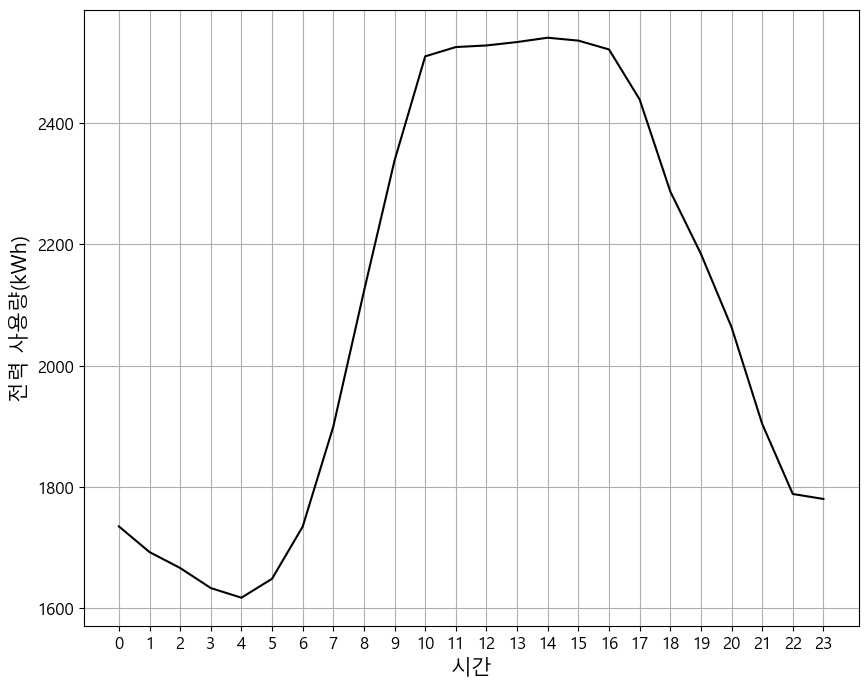

In [16]:
qq = eda_df[eda_df['태양광보유'] == 0].groupby(['hour']).mean()['전력사용량(kWh)']
plt.figure(figsize=(10,8))
plt.plot(qq, color = 'k')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
plt.show()

In [17]:
time = [11, 13, 14, 15, 16, 17, 18, 19]

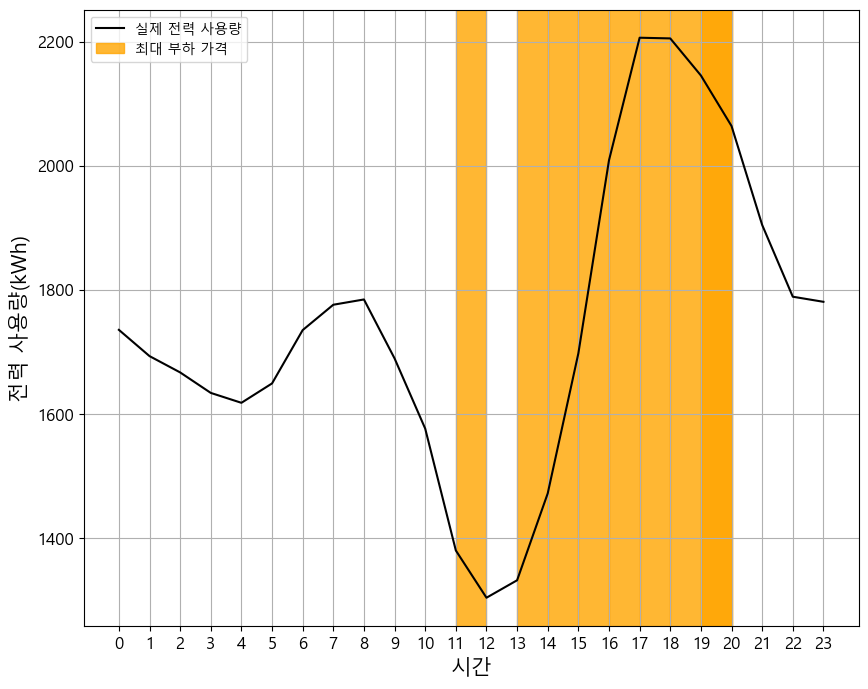

In [18]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

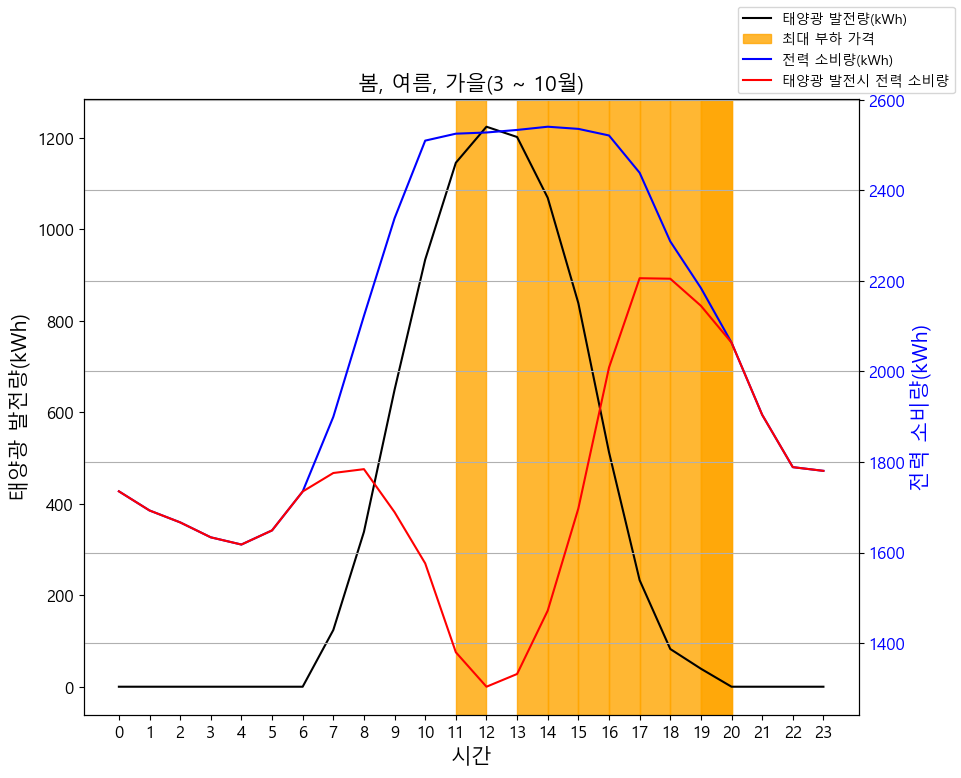

In [19]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')


for i in time:
    ax1.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')

plt.grid(True)
fig.legend()
plt.show()

In [20]:
time2 = [9, 10, 11, 16, 17, 18, 19]

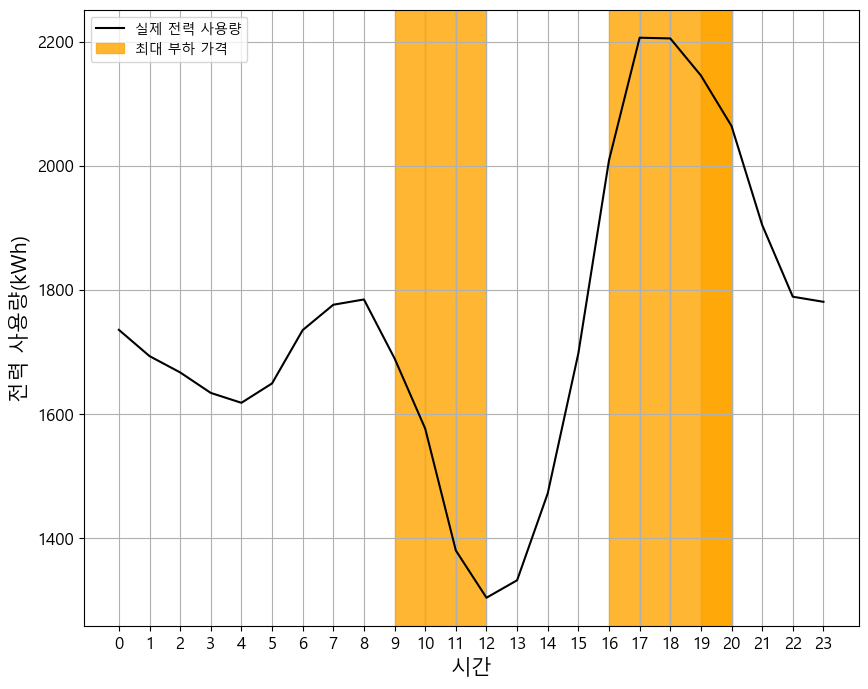

In [21]:
plt.figure(figsize=(10,8))
plt.plot(qq-ee, color = 'k', label = '실제 전력 사용량')
plt.grid(True)
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,24,1) , fontsize = 12)
plt.xlabel('시간', fontsize = 15)
plt.ylabel('전력 사용량(kWh)', fontsize = 15)
for i in time2:
    plt.axvspan(i, i+1, alpha=0.8, color='orange')
    if i == time2[-1]:
        plt.axvspan(i, i+1, alpha=0.8, color='orange', label = '최대 부하 가격')
plt.legend()
plt.show()

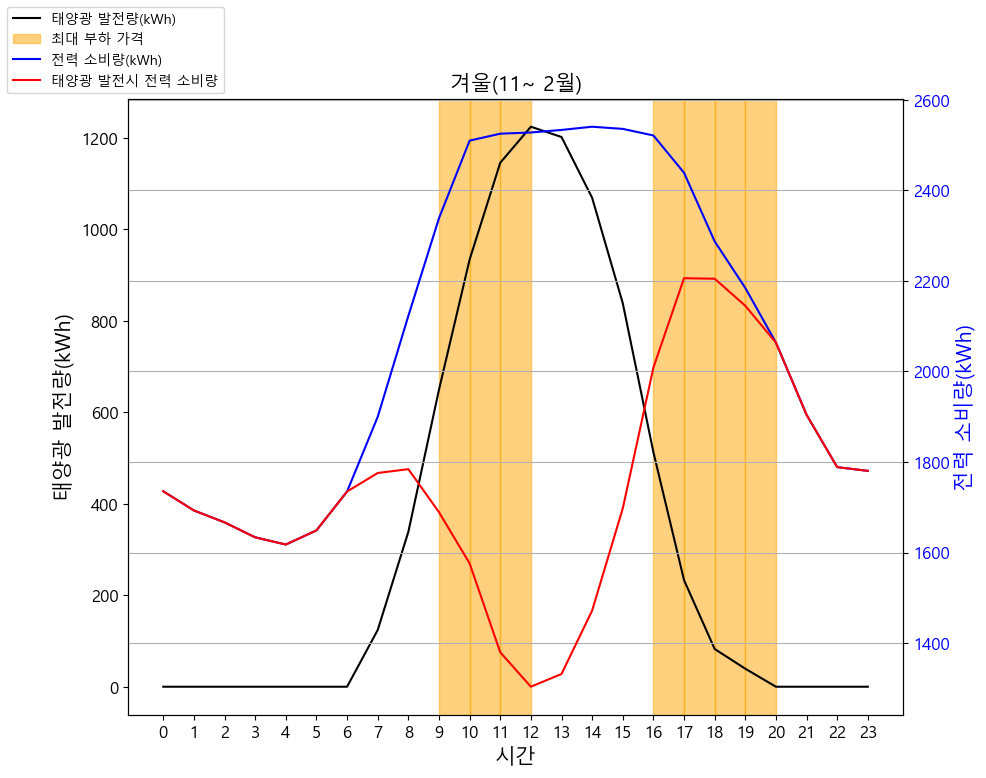

In [22]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전량(kWh)', color='k', fontsize=15)
ax1.plot(ee, color='k', label='태양광 발전량(kWh)')
ax1.tick_params(axis='y', labelcolor='k', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)')
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-ee, color='r', label='태양광 발전시 전력 소비량')

for i in time2:
    if i == time2[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')


fig.legend(loc='upper left')
plt.grid(True)
plt.show()


In [23]:
sell = {
    '시간' : ['경부하', '중간부하', '최대부하'],
    '여름철' : ['84.8', '137.7', '219.8'],
    '봄 가을철' : ['84.8','107.3','138.0'],
    '겨울철' : ['91.8', '137.9', '195.4']
}

In [24]:
sell = pd.DataFrame(sell)

In [25]:
sell

,시간,여름철,봄 가을철,겨울철
0,경부하,84.8,84.8,91.8
1,중간부하,137.7,107.3,137.9
2,최대부하,219.8,138.0,195.4


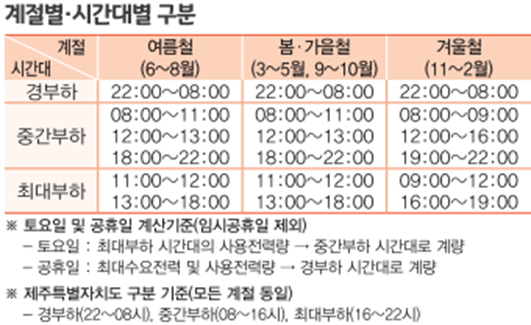

In [26]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [27]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 219.8, 137.7,
                137.7, 137.7, 84.8, 84.8]

In [28]:
normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 138, 107.3,
                107.3, 107.3, 84.8, 84.8]

In [29]:
winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 195.4,
                137.9, 137.9, 91.8, 91.8]

In [30]:
np.dot(winter_price, (qq-ee))

5742228.589568261

In [31]:
np.dot(winter_price, qq)

7101001.773278682

In [32]:
np.dot(winter_price, qq) - np.dot(winter_price, (qq - ee))

1358773.1837104205

---
# 최적화 - 겨울

In [33]:
import pulp

In [34]:
# 시간당 전력 생산량
production = ee

# 시간당 전력 사용량
consumption = qq
# 시간당 전력 가격
price = winter_price
# 모델 생성
model = pulp.LpProblem("Power Cost Minimization", pulp.LpMinimize)

# 변수 생성
use = [pulp.LpVariable("use{}".format(i), 0) for i in range(24)]
generated_use = [pulp.LpVariable("gen_use{}".format(i), 0) for i in range(24)]

# 목적함수 생성
total_cost = pulp.lpSum([(consumption[i] - generated_use[i]) * price[i] for i in range(24)])
model += total_cost

# 제약조건 생성
for i in range(24):
    model += generated_use[i] <= production[i]
    if i > 0:
        model += generated_use[i] <= pulp.lpSum([generated_use[j] for j in range(i)])
    model += generated_use[i] <= use[i]
    model += generated_use[i] >= pulp.lpSum([generated_use[j] for j in range(i)])
    model += use[i] >= generated_use[i]
    model += use[i] <= consumption[i]
    
model += pulp.lpSum(generated_use) == pulp.lpSum(consumption)
    
# 문제 풀이
model.solve()

# 결과 출력
for i in range(24):
    print("시간 {}: 생산량 = {:.2f}, 소비량 = {:.2f}, 사용량 = {:.2f}, 발전된 전력 사용량 = {:.2f}".format(i, production[i], consumption[i], use[i].value(), generated_use[i].value()))

print("전체 요금: {:.2f}".format(pulp.value(model.objective)))


시간 0: 생산량 = 0.00, 소비량 = 1735.23, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 1: 생산량 = 0.00, 소비량 = 1692.90, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 2: 생산량 = 0.00, 소비량 = 1666.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 3: 생산량 = 0.00, 소비량 = 1633.57, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 4: 생산량 = 0.00, 소비량 = 1617.61, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 5: 생산량 = 0.00, 소비량 = 1648.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 6: 생산량 = 0.00, 소비량 = 1734.80, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 7: 생산량 = 124.03, 소비량 = 1899.73, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 8: 생산량 = 338.65, 소비량 = 2122.85, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 9: 생산량 = 649.47, 소비량 = 2338.62, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 10: 생산량 = 934.12, 소비량 = 2510.15, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 11: 생산량 = 1145.87, 소비량 = 2525.47, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 12: 생산량 = 1224.68, 소비량 = 2528.12, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 13: 생산량 = 1202.18, 소비량 = 2533.75, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 14: 생산량 = 1069.22, 소비량 = 2540.87, 사용량 = 0.00, 발전된 전력 사용량 = 0.00
시간 15: 생산량 = 838.69, 소비량 = 253

In [35]:
import pyswarms as ps

In [36]:
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs


# PSO 알고리즘 설정
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=1000)

2023-05-29 22:16:49,661 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=5.53e+6
2023-05-29 22:16:56,043 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5532442.063962205, best pos: [1418.73269054  886.76179658  804.3367569   940.75287108  851.15688245
  828.73114184 1366.99708426  696.26905754  185.94676973  855.85031127
 1426.38100555 2170.33956617   30.00986775   38.50366334  759.76611083
   10.740039   1838.64905849  819.4682891   861.89278311  979.55683653
 1831.37219588  819.51583372  665.15733441 1457.93281687]


In [37]:
ee_2 = round(ee, 2)

In [38]:
qq_2 = round(qq,2)

In [39]:
(np.zeros(24), np.array(power_generation))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,  124.03086265,
         338.65378978,  649.46583908,  934.12122216, 1145.87171128,
        1224.68194677, 1202.18163322, 1069.21578177,  838.69461399,
         512.95469621,  233.04044732,   82.51842252,   39.37393395,
           0.        ,    0.        ,    0.        ,    0.        ]))

In [99]:
# 변수와 데이터 정의
power_generation = ee_2 # 시간당 태양광 발전량 리스트
power_usage = qq_2 # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            accumulated_gen += gen_hour
            gen_used = min(accumulated_gen, usage_hour, x[i, hour])
            accumulated_gen -= gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
bounds = (np.zeros(24), np.array(power_usage))
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=2000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used

2023-05-29 22:52:55,319 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.1, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=5.5e+6
2023-05-29 22:53:09,007 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5501698.013282028, best pos: [ 799.34996416 1374.91702045  166.01223369  540.00323236  529.58714706
 1040.60068414  622.45729335 1331.3387029   265.55620174 1622.49722407
 1872.90118396 2057.91049208   37.16575639   91.           14.43689417
   82.11028304 1047.12185265 2053.97336952 1819.69727534 1322.18157153
 1299.41033193 1677.06547859 1238.0327092   538.70131549]


Minimum cost: 5501698.013282028
Power usage schedule: [ 799.34996416 1374.91702045  166.01223369  540.00323236  529.58714706
 1040.60068414  622.45729335 1331.3387029   265.55620174 1622.49722407
 1872.90118396 2057.91049208   37.16575639   91.           14.43689417
   82.11028304 1047.12185265 2053.97336952 1819.69727534 1322.18157153
 1299.41033193 1677.06547859 1238.0327092   538.70131549]


In [105]:
np.dot((qq-ee), winter_price)

5742228.589568261

In [106]:
np.dot((qq-hourly_gen_used), winter_price)


5501699.79056071

In [41]:
ee_cusum = ee.cumsum()

# 적합성 함수 정의
def minimize_cost(x):
    n_particles = x.shape[0]
    costs = np.zeros(n_particles)

    for i in range(n_particles):
        total_cost = 0
        accumulated_gen = 0
        total_gen_used = 0

        for hour in range(24):
            gen_hour = power_generation[hour]
            usage_hour = power_usage[hour]
            price_hour = power_price[hour]

            gen_used = min(usage_hour - accumulated_gen, gen_hour, x[i, hour])
            gen_used = max(0, gen_used)
            accumulated_gen += gen_used
            total_gen_used += gen_used

            total_cost += (usage_hour - gen_used) * price_hour

        costs[i] = total_cost

        if np.sum(power_generation) != total_gen_used:
            costs[i] += 1e6

    return costs

# PSO 알고리즘 설정
options = {'c1': 0.1, 'c2': 0.3, 'w': 1.5}

lb = [0]*24  # E(x)의 하한
epsilon = 1e-8  # 작은 양수
ub = ee_2.cumsum()
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

bounds = (lb, ub)
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=24, options=options, bounds=bounds)

# 최적화 실행
cost, pos = optimizer.optimize(minimize_cost, iters=2000)

print(f"Minimum cost: {cost}")
print(f"Power usage schedule: {pos}")

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen = 0
hourly_gen_used = np.zeros(24)
for hour in range(24):
    gen_hour = power_generation[hour]
    usage_hour = power_usage[hour]
    accumulated_gen += gen_hour
    gen_used = min(accumulated_gen, usage_hour, pos[hour])
    gen_used = max(0, gen_used)
    accumulated_gen -= gen_used
    hourly_gen_used[hour] = gen_used


In [96]:
pos.sum()

nan

In [44]:
hourly_gen_used.sum()

8394.79

In [45]:
ee.sum()

8394.804900710611

In [46]:
qq.sum()

50235.2573172077

In [47]:
print(f"Minimum cost: {cost}")

print(f"Hourly generated power usage: {hourly_gen_used}")

print(f"Power usage schedule: {pos}")

Minimum cost: 7605587.061767611
Hourly generated power usage: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.26852521e-01
 2.85324950e+00 8.07221000e+02 1.23596890e+03 1.14587000e+03
 1.20194292e+03 1.22491708e+03 1.06922000e+03 8.38690000e+02
 5.12950000e+02 2.33040000e+02 8.25200000e+01 3.93700000e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Power usage schedule: [           nan            nan            nan            nan
            nan            nan            nan 2.26852521e-01
 2.85324950e+00 8.07221000e+02 1.88343654e+03 1.47448161e+03
 1.20194292e+03 3.63956264e+03 1.81759912e+03 3.17992948e+03
 4.05878560e+03 7.74075337e+03 3.58664960e+03 1.93579477e+03
 5.57881558e+03 5.59243414e+03 5.97768835e+02 6.19897604e+03]


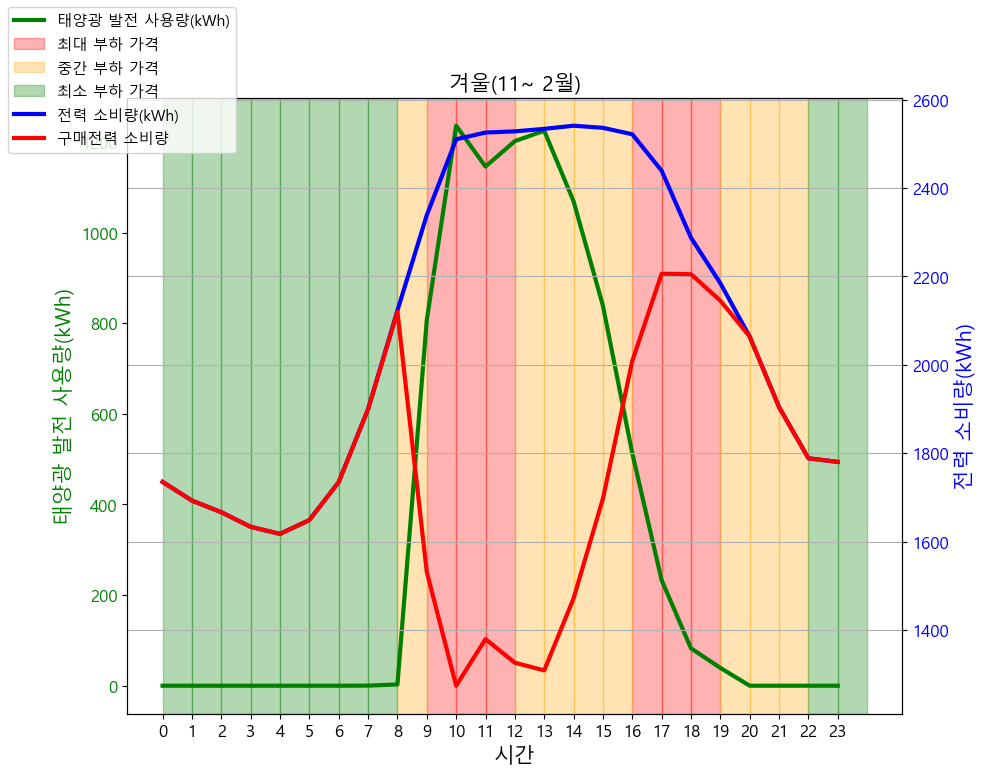

In [48]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='green', fontsize=15)
ax1.plot(hourly_gen_used, color='green', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='green', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('겨울(11~ 2월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used, color='r', label='구매전력 소비량', linewidth = 3)

for i in winter_max:
    if i == winter_max[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='red', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='red')
    
for i in winter_mid:
    if i == winter_mid[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange', label='중간 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='orange')

for i in winter_min:
    if i == winter_min[-1]:
        ax1.axvspan(i, i+1, alpha=0.3, color='green', label='최소 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.3, color='green')



fig.legend(loc='upper left',  fontsize = 11)
plt.grid(True)
plt.show()


In [50]:
import random
from deap import base, creator, tools, algorithms

# 변수와 데이터 정의
power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 정의
def minimize_cost(individual):
    total_cost = 0
    accumulated_gen = 0

    for hour in range(24):
        gen_hour = power_generation[hour]
        usage_hour = power_usage[hour]
        price_hour = power_price[hour]

        accumulated_gen += gen_hour
        gen_used = min(accumulated_gen, usage_hour, individual[hour])
        accumulated_gen -= gen_used

        total_cost += (usage_hour - gen_used) * price_hour

    return total_cost,

# 유전 알고리즘 설정
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=24)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", minimize_cost)

# 최적화 실행
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Avg", np.mean)
stats.register("Std", np.std)
stats.register("Min", np.min)
stats.register("Max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3000, stats=stats, halloffame=hof, verbose=True)

best_individual = hof[0]
best_cost = minimize_cost(best_individual)


print(f"Minimum cost: {best_cost[0]}")
print(f"Power usage schedule: {best_individual}")

In [53]:
from scipy.optimize import linprog

power_generation = ee # 시간당 태양광 발전량 리스트
power_usage = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price = winter_price # 시간당 전력 가격 리스트

# 목적 함수 계수 정의
c = np.hstack((power_price, np.zeros(24)))

# 제약 조건 정의
A_eq = []
b_eq = []

# 발전된 전력 사용량은 현재 시간까지 발전된 양만 사용할 수 있음
for i in range(24):
    A_eq.append([0] * i + [1] * (24 - i) + [-1 if j == i else 0 for j in range(24)])
    b_eq.append(power_generation[i])

# 하루에 발전된 전력은 모두 사용해야 함
A_eq.append([0]*24 + [-1]*24)
b_eq.append(-sum(power_generation))

# 전력 사용량과 전력 발전량, 전력 가격은 고정이지만, 발전된 전력 사용량은 어느 시간에 사용할지는 정할 수 있음
bounds = [(0, usage) for usage in power_usage] + [(0, None) for _ in range(24)]

# 선형 계획법 실행
res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# 결과 출력
if res.success:
    minimum_cost = res.fun
    power_usage_schedule = res.x[:24]

    print(f"Minimum cost: {minimum_cost}")
    print(f"Power usage schedule: {power_usage_schedule}")
else:
    print("Optimization failed. Please check the constraints and data.")


---
# 최적화 - 봄, 가을

In [55]:
np.dot(normal_price, qq-ee)

4482914.645611405

In [56]:
# 변수와 데이터 정의
power_generation_normal = ee # 시간당 태양광 발전량 리스트
power_usage_normal = qq # 시간당 공장에서 전력을 사용하는 양 리스트
power_price_normal = normal_price # 시간당 전력 가격 리스트

# PSO 알고리즘 설정
options_normal = {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
bounds_normal = (np.zeros(24), np.array(power_usage_normal))
optimizer_normal = ps.single.GlobalBestPSO(n_particles=25, dimensions=24, options=options_normal, bounds=bounds_normal)

def minimize_cost_normal(x):
    n_particles_normal = x.shape[0]
    costs_normal = np.zeros(n_particles_normal)

    for i in range(n_particles_normal):
        total_cost_normal = 0
        accumulated_gen_normal = 0

        for hour in range(24):
            gen_hour_normal = power_generation_normal[hour]
            usage_hour_normal = power_usage_normal[hour]
            price_hour_normal = power_price_normal[hour]

            accumulated_gen_normal += gen_hour_normal
            gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, x[i, hour])
            accumulated_gen_normal -= gen_used_normal

            total_cost_normal += (usage_hour_normal - gen_used_normal) * price_hour_normal

        costs_normal[i] = total_cost_normal

    return costs_normal

# 최적화 실행
cost_normal, pos_normal = optimizer_normal.optimize(minimize_cost_normal, iters=2000)

# 시간당 발전된 전력 사용량 계산 및 출력
accumulated_gen_normal = 0
hourly_gen_used_normal = np.zeros(24)
for hour in range(24):
    gen_hour_normal = power_generation_normal[hour]
    usage_hour_normal = power_usage_normal[hour]
    accumulated_gen_normal += gen_hour_normal
    gen_used_normal = min(accumulated_gen_normal, usage_hour_normal, pos_normal[hour])
    accumulated_gen_normal -= gen_used_normal
    hourly_gen_used_normal[hour] = gen_used_normal

2023-05-29 22:17:42,651 - pyswarms.single.global_best - INFO - Optimize for 2000 iters with {'c1': 0.7, 'c2': 0.3, 'w': 1.5}
pyswarms.single.global_best: 100%|██████████|2000/2000, best_cost=4.4e+6
2023-05-29 22:17:50,121 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4401543.330793355, best pos: [ 276.58254439 1296.04336277  706.01543095 1051.88933749 1128.98140536
  997.97814071  727.40047252 1562.89028956   15.75745938  302.17302384
   13.67962119 1913.53304039  164.78126608 2408.52878236  461.67647493
  575.17660207  365.10614172 2219.76684337  541.29871544  504.89950957
  771.5194246  1314.57173353 1519.12633589 1343.65908903]


In [57]:
print(f"Minimum cost: {cost_normal}")

print(f"Hourly generated power usage: {hourly_gen_used_normal}")

print(f"Power usage schedule: {pos_normal}")

Minimum cost: 4401543.330793355
Hourly generated power usage: [   0.            0.            0.            0.            0.
    0.            0.          124.03086265   15.75745938  302.17302384
   13.67962119 1913.53304039  164.78126608 2408.52878236  461.67647493
  575.17660207  365.10614172 1928.46926961   82.51842252   39.37393395
    0.            0.            0.            0.        ]
Power usage schedule: [ 276.58254439 1296.04336277  706.01543095 1051.88933749 1128.98140536
  997.97814071  727.40047252 1562.89028956   15.75745938  302.17302384
   13.67962119 1913.53304039  164.78126608 2408.52878236  461.67647493
  575.17660207  365.10614172 2219.76684337  541.29871544  504.89950957
  771.5194246  1314.57173353 1519.12633589 1343.65908903]


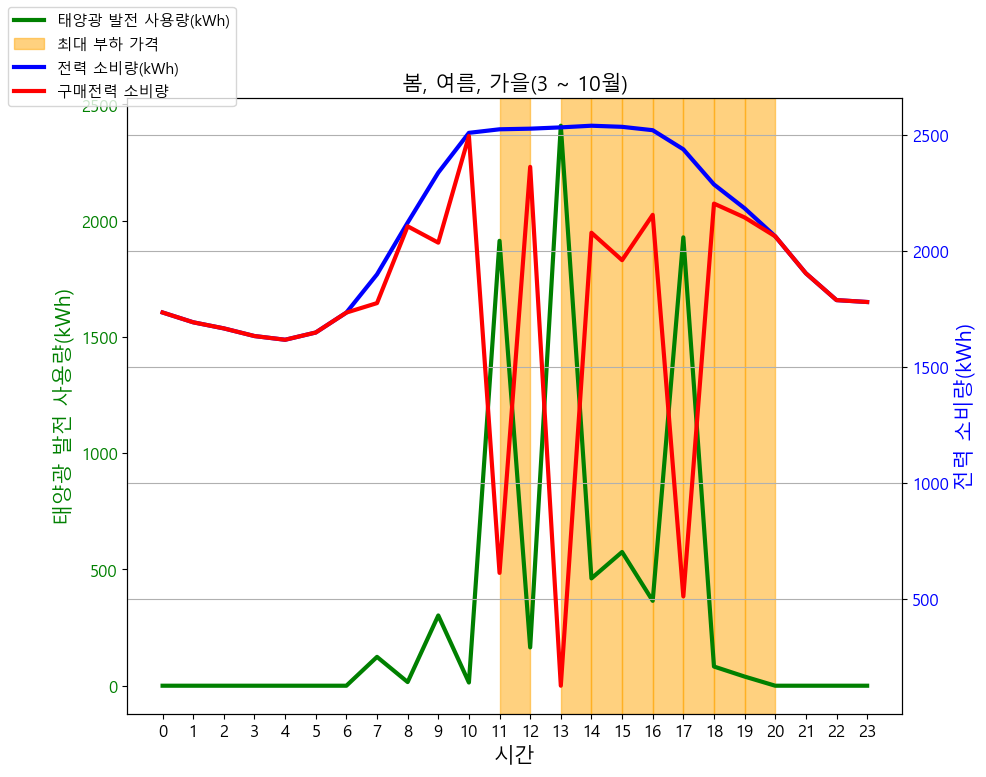

In [58]:
fig, ax1 = plt.subplots(figsize=(10, 8))

ax1.set_xlabel('시간', fontsize=15)
ax1.set_ylabel('태양광 발전 사용량(kWh)', color='g', fontsize=15)
ax1.plot(hourly_gen_used_normal, color='g', label='태양광 발전 사용량(kWh)', linewidth = 3)
ax1.tick_params(axis='y', labelcolor='g', labelsize=12)
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_xticklabels(np.arange(0, 24, 1), fontsize=12)
ax1.set_title('봄, 여름, 가을(3 ~ 10월)', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('전력 소비량(kWh)', color='b', fontsize=15)
ax2.plot(qq, color='b', label='전력 소비량(kWh)', linewidth = 3)
ax2.tick_params(axis='y', labelcolor='b', labelsize=12)

plt.plot(qq-hourly_gen_used_normal, color='r', label='구매전력 소비량', linewidth = 3)

for i in time:
    if i == time[-1]:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange', label='최대 부하 가격')
    else:
        ax1.axvspan(i, i+1, alpha=0.5, color='orange')
    

fig.legend(loc='upper left', fontsize = 11)
plt.grid(True)
plt.show()


pd.DataFrame([ee, qq, hourly_gen_used_normal, pos_normal, qq-hourly_gen_used_normal, np.array(winter_price), np.array(normal_price), np.array(summer_price)], 
             index=['실제 발전량','실제 전력 사용량','발전 사용량', '구매 사용량', '구매전력 소비량', '겨울 전력 가격', '봄 가을 전력 가격', '여름 전력 가격']).T.to_csv('total_info.csv', index=True, encoding='cp949')

from pyomo.environ import *

def minimize_cost(power_generation, power_usage, power_price):
    model = ConcreteModel()

    hours = range(24)

    # 변수: 각 시간대별 태양광 발전량
    model.x = Var(hours, within=NonNegativeReals)

    # 제약 조건
    model.constraints = ConstraintList()

    # 각 시간대별로 태양광 발전량이 전력 사용량을 초과하지 않아야 함
    for hour in hours:
        model.constraints.add(expr=model.x[hour] <= min(power_generation[hour], power_usage[hour]))
    
    # 태양광 발전량의 총합이 전체 전력 사용량을 초과할 수 없음
    model.constraints.add(expr=sum(model.x[hour] for hour in hours) <= sum(power_usage[hour] for hour in hours))

    # 목적 함수: 전력 가격과 전력 사용량의 차이를 최소화
    model.cost = Objective(expr=sum((power_usage[hour] - model.x[hour]) * power_price[hour] for hour in hours))

    # Solver 설정 및 최적화
    solver = SolverFactory('cbc')
    solver.solve(model)

    # 결과 출력
    optimal_generation = [value(model.x[hour]) for hour in hours]
    optimal_cost = value(model.cost)

    return optimal_generation, optimal_cost

# 예시 사용
power_generation = ee  # 시간당 태양광 발전량 리스트
power_usage = qq  # 시간당 전력 사용량 리스트
power_price = winter_price  # 시간당 전력 가격 리스트

n_particles = 10  # 파티클 개수
optimal_costs = minimize_cost(power_generation, power_usage, power_price)
print(optimal_costs)


In [87]:
from pyswarm import pso

def objective_function(x):
    # 여기서 x는 각 시간대에 대한 E(x)의 값들을 나타냅니다.
    g = ee_2  # g(x) 계산
    t = winter_price  # t(x) 계산
    return sum((g[i] - x[i]) * t[i] for i in range(24))

def constraint_1(x):
    # 이 제약 조건은 부등식 형태여야 하며, 비음수 값을 반환해야 합니다.
    # 그래서 이것은 f(x) - g(x) - h(x)의 합으로 표현되어야 합니다.
    f = qq_2  # f(x) 계산
    g = ee_2  # g(x) 계산
    h = winter_price  # h(x) 계산
    return sum(f[i] - g[i] - h[i] for i in range(24))

def constraint_2(x):
    # 이 제약 조건 역시 부등식 형태여야 합니다.
    h = ee_2.cumsum()  # h(x) 계산
    return sum(x[i] - h[i] for i in range(24))

lb = [0]*24  # E(x)의 하한
ub = ee_2
epsilon = 1e-8  # 작은 양수
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

# PSO 알고리즘 실행
xopt, fopt = pso(objective_function, lb, ub, f_ieqcons=constraint_2)

print("Optimal solution x:", xopt)
print("Objective function value:", fopt)


Stopping search: maximum iterations reached --> 100
However, the optimization couldn't find a feasible design. Sorry
Optimal solution x: [3.11342415e-09 2.74502057e-09 7.24787169e-09 4.19124693e-09
 9.39999484e-09 4.71953498e-09 3.93149069e-09 2.64119827e+01
 1.23817176e+02 3.63357710e+02 1.62093364e+02 3.95201918e+02
 2.66900252e+02 6.07655492e+02 8.82972986e+02 2.39872798e+00
 1.41907542e+02 9.28102708e+00 3.97243017e+01 1.47434401e+01
 6.90387303e-09 9.97682326e-09 9.70915783e-09 5.80035629e-10]
Objective function value: 1e+100


In [92]:
from pyswarm import pso

# 큰 페널티 값 설정
penalty = 1e30

def objective_function(x):
    # 여기서 x는 각 시간대에 대한 E(x)의 값들을 나타냅니다.
    g = ee_2  # g(x) 계산
    t = winter_price  # t(x) 계산

    # 초기 목적함수 계산
    obj = sum((g[i] - x[i]) * t[i] for i in range(24))

    # 제약조건 1
    f = qq_2  # f(x) 계산
    h = [ee_2[:i].sum() for i in range(1, 25)]  # h(x) 계산
    constraint_1 = sum(f[i] - g[i] - h[i] for i in range(24))

    # 제약조건 2
    constraint_2 = sum(x[i] - h[i] for i in range(24))

    # 제약조건 위반에 따른 페널티 추가
    if constraint_1 < 0:
        obj += penalty * abs(constraint_1)
    if constraint_2 < 0:
        obj += penalty * abs(constraint_2)

    return obj


lb = [0]*24  # E(x)의 하한
epsilon = 1e-8  # 작은 양수
ub = ee_2.cumsum()
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

# PSO 알고리즘 실행
xopt, fopt = pso(objective_function, lb, ub)

print("Optimal solution x:", xopt)
print("Objective function value:", fopt)


Stopping search: maximum iterations reached --> 100
Optimal solution x: [2.89047660e-11 1.63680578e-09 2.95530251e-09 8.01812476e-09
 4.85243433e-09 9.87916325e-10 4.30395507e-09 1.19249216e+02
 4.62680000e+02 1.11215000e+03 2.04627000e+03 3.19214000e+03
 4.41682000e+03 5.61900000e+03 6.68822000e+03 7.52691000e+03
 8.03986000e+03 8.27290000e+03 8.35542000e+03 8.39479000e+03
 8.39479000e+03 8.39479000e+03 8.39479000e+03 8.39479000e+03]
Objective function value: 5.599467078421754e+34


In [109]:
from pyswarm import pso

# 큰 페널티 값 설정
penalty = 1e30

def objective_function(x):
    # 여기서 x는 각 시간대에 대한 E(x)의 값들을 나타냅니다.
    g = ee_2  # g(x) 계산
    t = winter_price  # t(x) 계산

    # 초기 목적함수 계산
    obj = sum((g[i] - x[i]) * t[i] for i in range(24))

    # 제약조건 1
    f = qq_2  # f(x) 계산
    h = [ee_2[:i+1].sum() - (x[i-1] if i>0 else 0) for i in range(24)]  # h(x) 계산
    constraint_1 = sum(f[i] - g[i] - h[i] for i in range(24))

    # 제약조건 2
    constraint_2 = sum(x[i] - h[i] for i in range(24))

    # 제약조건 위반에 따른 페널티 추가
    if constraint_1 < 0:
        obj += penalty * abs(constraint_1)
    if constraint_2 < 0:
        obj += penalty * abs(constraint_2)

    return obj


lb = [0]*24  # E(x)의 하한
epsilon = 1e-8  # 작은 양수
ub = ee_2
ub = [max(u, l+epsilon) for u, l in zip(ub, lb)]

# PSO 알고리즘 실행
xopt, fopt = pso(objective_function, lb, ub)

print("Optimal solution x:", xopt)
print("Objective function value:", fopt)


Stopping search: maximum iterations reached --> 100
Optimal solution x: [9.94786838e-09 1.15484142e-09 4.30645797e-09 7.42194232e-09
 0.00000000e+00 9.99227547e-09 1.23382782e-09 1.24030000e+02
 3.38650000e+02 6.49470000e+02 9.34120000e+02 1.14587000e+03
 1.22468000e+03 1.20218000e+03 1.06922000e+03 8.38690000e+02
 5.12950000e+02 2.33040000e+02 8.25200000e+01 3.71633633e+01
 2.66467899e-09 5.67773352e-09 6.41094263e-09 1.00000000e-08]
Objective function value: 1.286424899099677e+35


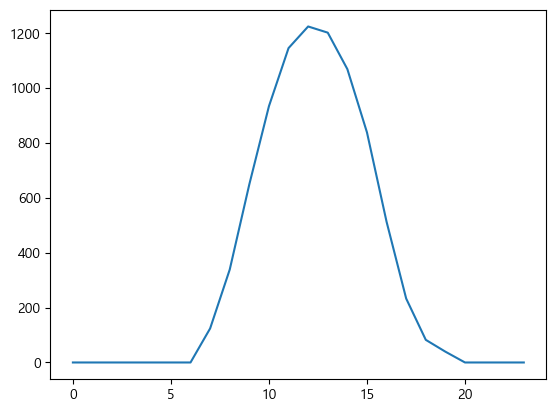

In [93]:
plt.plot(ee_2)

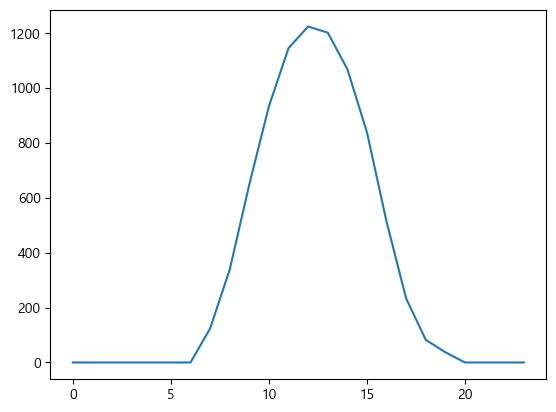

In [110]:
plt.plot(xopt)

In [83]:
fopt

1.45499814511027e+35